In [424]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import math

In [393]:
raw_data = pd.read_csv("8358_1.csv")
#Drop unneccessary columns
data = raw_data.drop(['id','name','country','city','address','categories','keys','menuPageURL','menus.currency','menus.dateSeen','menus.description','postalCode','priceRangeMin','priceRangeMax','priceRangeCurrency'],axis=1)

In [394]:
#filters out uncommon pizzas (less than 20 mentioned)
data = data.groupby("menus.name").filter(lambda x: len(x) >= 20)
data = data.dropna()
data.groupby("menus.name")["menus.name"].count()

menus.name
Bbq Chicken Pizza         35
Buffalo Chicken Pizza     36
Cheese Pizza             118
Create Your Own Pizza     12
Greek Pizza               27
Hawaiian Pizza            48
Margherita Pizza          54
Mexican Pizza             26
Pepperoni Pizza           37
Pizza                     51
Pizza Bread               25
Pizza Burger              48
Pizza By The Slice        24
Pizza Fries               30
Pizza Margherita          22
Pizza Steak               30
Pizza Sub                 26
Sicilian Pizza            21
Taco Pizza                31
Vegetarian Pizza          19
Veggie Pizza              30
White Pizza               66
Name: menus.name, dtype: int64

In [395]:
pizzas = data.groupby('menus.name').mean()
pizzas = pizzas.drop(['latitude','longitude'],axis=1)
pizzas = pizzas.reset_index() #so we can graph it
pizzas_med = data.groupby('menus.name').median()
pizzas_med = pizzas_med.drop(['latitude','longitude'],axis=1)
pizzas_med = pizzas_med.reset_index()

In [396]:

fig = go.Figure(
        data=go.Scattergeo(
            opacity=0.7,
            lon = data['longitude'],
            lat = data['latitude'],
            mode = 'markers',
            text = '$' + data['menus.amountMax'].astype(str),
            marker = dict(
                colorscale = 'rainbow',
                size=data['menus.amountMax']/3, #tried logarithm transformation but couldn't work cause of log(0)
                color=data['menus.amountMax'],
                colorbar_title="Upper Prices of Pizza"
            )
        )
)
fig.update_layout(
        title = 'Upper Pizza Menu Prices',
        geo_scope='usa',
    )
fig.show()

In [298]:
fig = go.Figure(
        data=go.Scattergeo(
            opacity=0.7,
            lon = data['longitude'],
            lat = data['latitude'],
            mode = 'markers',
            text = '$' + data['menus.amountMin'].astype(str),
            marker = dict(
                colorscale = 'rainbow',
                size=data['menus.amountMin']/2, #tried logarithm transformation but couldn't work
                color=data['menus.amountMin'],
                colorbar_title="Lower Prices of Pizza"
            )
        )
)
fig.update_layout(
        title = 'Lower Pizza Menu Prices',
        geo_scope='usa',
    )
fig.show()

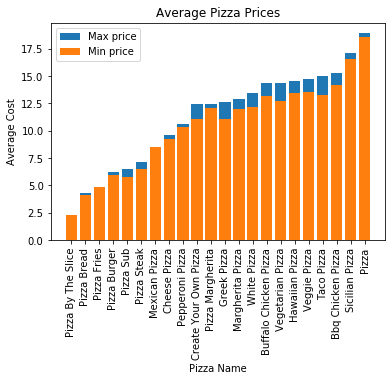

In [382]:
pizzas = pizzas.sort_values("menus.amountMax")
fig,ax = plt.subplots()
ax.bar(pizzas['menus.name'],pizzas['menus.amountMax'])
ax.bar(pizzas['menus.name'],pizzas['menus.amountMin'])
ax.set_ylabel("Average Cost")
ax.set_xlabel("Pizza Name")
ax.set_xticklabels(pizzas['menus.name'],rotation=90)
plt.title("Average Pizza Prices")
plt.legend(loc="upper left",labels=['Max price','Min price'])
plt.show()

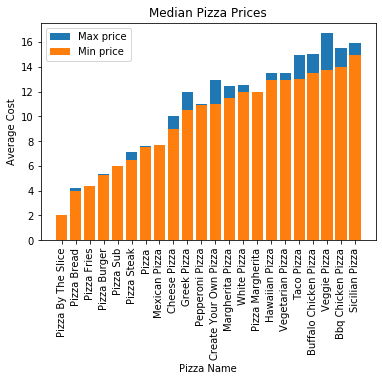

In [371]:
pizzas_med = pizzas_med.sort_values("menus.amountMin")
fig,ax = plt.subplots()
ax.bar(pizzas_med['menus.name'],pizzas_med['menus.amountMax'])
ax.bar(pizzas_med['menus.name'],pizzas_med['menus.amountMin'])
ax.set_ylabel("Average Cost")
ax.set_xlabel("Pizza Name")
ax.set_xticklabels(pizzas_med['menus.name'],rotation=90)
plt.title("Median Pizza Prices")
plt.legend(loc="upper left",labels=['Max price','Min price'])
plt.show()

[]

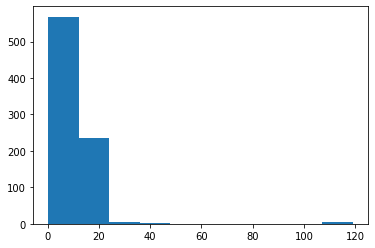

In [405]:
#attempting to plot pizza prices by province, using their median
data2 = data.groupby('province').median()
fig = go.Figure(
        data=go.Scattergeo(
            opacity=0.7,
            lon = data2['longitude'],
            lat = data2['latitude'],
            mode = 'markers',
            text = '$' + data2['menus.amountMax'].astype(str),
            marker = dict(
                colorscale = 'rainbow',
                size=data2['menus.amountMax'],
                color=data2['menus.amountMax'],
                colorbar_title="Upper Prices of Pizza"
            )
        )
)
fig.update_layout(
        title = 'Upper Median Pizza Prices by Province',
        geo_scope='usa',
    )
fig.show()